# Decoding Hits: Analyzing Audio Features and Song Popularity Across Platforms
## By Zina Grigorian

**The "Spotify and YouTube" dataframe by Salvatore Rastelli contains information about songs available on both Spotify and YouTube. This dataframe includes a variety of features such as the song title, artist name, album details, audio characteristics and popularity metrics.**
In this analysis, I aim to explore the relationship between these audio features and the popularity of songs on both platforms. Specifically, I want to identify which audio characteristics are most closely associated with higher views and streams, and how these features differ between the most popular tracks on Spotify and YouTube. Additionally, I will investigate whether certain metrics, like danceability or loudness, are more predictive of a song's success on one platform versus the other. By understanding these patterns, the analysis seeks to provide insights that could inform content creation and marketing strategies for artists and producers.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Spotify_Youtube.csv')

---

## Overview of the Spotify and YouTube Dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [4]:
df.isnull().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

### The dataframe includes the following variables:
1. **Index (Unnamed):** The position of the song in the dataframe.
2. **Artist:** The name of the artist or band who performed the song.
3. **Url_spotify:** The URL link to the artist on Spotify.
4. **Track:** The title of the song, as visible on the Spotify platform.
5. **Album:** The name of the album in which the song is contained on Spotify.
6. **Album_type:** Indicates if the song is released on Spotify as a single or contained in an album.
7. **Uri:** The unique Spotify URI (Uniform Resource Indicator) for the track.
8. **Danceability:** A measure from Spotify that describes how suitable the track is for dancing, ranging from 0 (least danceable) to 1 (most danceable), considering elements like tempo and beat.
9. **Energy:** A measure from Spotify that reflects the intensity and activity level of the track, ranging from 0 (least energetic) to 1 (most energetic), considering elements like dynamic range and perceived loudness.
10. **Key:** The musical key in which the song is composed. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
11. **Loudness:** The overall loudness of the track, averaged across the entire track, measured in decibels (dB) according to Spotify. Values typically range between -60 dB (quiet) and 1 dB (loud).
12. **Speechiness:** Measures how much a track contains spoken words. Values above 0.66 indicate mostly speech, like talk shows or audiobooks. Values between 0.33 and 0.66 suggest a mix of speech and music, like rap. Values below 0.33 most likely represent music and other non-speech-like tracks.
13. **Acousticness:** A confidence measure from 0 to 1 of whether the track is acoustic. 1 represents high confidence the track is acoustic.
14. **Instrumentalness:** Predicts whether a track has no vocals. Sounds like "ooh" and "aah" are considered instrumental in this context. The closer the value is to 1, the more likely the track is purely instrumental. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.
15. **Liveness:** Detects the presence of an audience in the recording. Ranging from 0 to 1, higher values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
16. **Valence:** A measure ranging from 0 to 1, describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
17. **Tempo:** The tempo of the track in beats per minute (BPM).
18. **Duration_ms:** The length of the song in milliseconds.
19. **Url_youtube:** The URL link to the song on YouTube.
20. **Title:** The title of the video on YouTube.
21. **Channel:** The name of the YouTube channel that has published the video.
22. **Views:** The number of views the video has received on YouTube.
23. **Likes:** The number of likes the video has received on YouTube.
24. **Comments:** The number of comments the video has received on YouTube.
25. **Description:** The description of the video on YouTube.
26. **Licensed:** A boolean (True/False) value indicating whether the video represents licensed content, which means that the content was uploaded to a channel linked to a YouTube content partner and then claimed by that partner.
27. **official_video:** A boolean (True/False) value indicating whether the YouTube video is the official video of the song.
28. **Stream:** The number of streams the song has received on Spotify.

---

## DataFrame Modifications and Adjustments

In the following sections, I will explain the changes I made to the DataFrame and the reasons behind each decision. These changes were made to simplify the data, making it more streamlined and ensuring that we focus only on the most relevant and understandable information for our analysis.

### Column Removal

I decided to drop some columns from the DataFrame. The goal was to eliminate unnecessary or confusing data, making the analysis more straightforward and meaningful.

- **Unnamed Index Column:** This column was an automatically generated index and did not provide any valuable information for the analysis. It seemed to be just an extra index or placeholder, so it was removed to declutter the DataFrame.

In [5]:
# Drop the first column
df.drop(df.columns[0], axis=1, inplace=True)

- **Urls:** These columns contained URLs and unique identifiers specific to each song on Spotify and YouTube. Since these links and identifiers do not contribute to the analysis of audio features or popularity metrics, they were dropped.

In [6]:
# Drop 'Url_spotify', 'Uri', 'Url_youtube'
columns_to_drop = ['Url_spotify', 'Uri', 'Url_youtube']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

- **Description:** The 'Description' of each YouTube video, while potentially interesting, was unmeasurable and did not offer quantitative data for analysis.

In [7]:
# Drop the 'Description' column
df.drop(columns=['Description'], axis=1, inplace=True)

- **Key and Tempo:** These columns were removed because they require specific musical knowledge to interpret correctly. Without sufficient understanding of these features, including them could complicate the analysis without adding significant value.

In [8]:
# Drop the 'Key' and 'Tempo' columns
df.drop(columns=['Key', 'Tempo'], axis=1, inplace=True)

### Column Reordering

I reordered columns in the DataFrame to make the information flow better and match my analysis. The new order groups similar details together, making the DataFrame more organized and easier to use. For example, we put all the Spotify data together, followed by the YouTube data, and then listed the audio features.

In [9]:
# Reorder the columns
new_order = [
    'Artist', 'Track', 'Album', 'Album_type', 'Duration_ms', 'Stream', 
    'Title', 'Channel', 'Views', 'Likes', 'Comments', 'Licensed', 
    'official_video', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 
    'Acousticness', 'Instrumentalness', 'Liveness', 'Valence'
]
df = df[new_order]

### Milliseconds to Minutes

I changed the duration of a song from milliseconds to minutes because minutes are a more intuitive and commonly used unit of time for understanding the length of a song, making the data easier to work with and analyze.

In [10]:
# Convert 'Duration_ms' from milliseconds to minutes
df['Duration_ms'] = df['Duration_ms'] / 60000

# Rename the column from 'Duration_ms' to 'Duration_min'
df.rename(columns={'Duration_ms': 'Duration_min'}, inplace=True)

# Convert 'Duration_min' from minutes to a timedelta type
df['Duration_min'] = pd.to_timedelta(df['Duration_min'], unit='m')

# Round the timedelta to the nearest second
df['Duration_min'] = df['Duration_min'].dt.round('s')

### Adding a Combined Views and Streams Column

To simplify the analysis of a song's overall popularity across platforms, I added a new column that sums the Views from YouTube and the Streams from Spotify. This combined metric provides a clearer picture of each song's total reach, allowing for more straightforward comparisons and insights into how well a track performs across both platforms.

In [11]:
# Create a new column that sums 'Views' and 'Stream'
df['Views_Stream_Sum'] = df['Views'] + df['Stream']

In [12]:
df.head()

,Artist,Track,Album,Album_type,Duration_min,Stream,Title,Channel,Views,Likes,...,official_video,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Views_Stream_Sum
0,Gorillaz,Feel Good Inc.,Demon Days,album,0 days 00:03:43,1.040235e+09,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,...,True,0.818,0.705,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,1.733790e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0 days 00:03:20,3.100837e+08,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,...,True,0.676,0.703,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,3.820954e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0 days 00:03:35,6.306347e+07,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,...,True,0.695,0.923,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,7.149852e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0 days 00:03:54,4.346636e+08,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,...,True,0.689,0.739,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,6.464185e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0 days 00:05:41,6.172597e+08,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,...,True,0.663,0.694,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,1.235741e+09


---

## General Statistics of the DataFrame

In [13]:
# Set the display format to show numbers in a standard decimal format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Show general statistics about the DF
general_stats = df.describe()
general_stats

,Duration_min,Stream,Views,Likes,Comments,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Views_Stream_Sum
count,20716,20142.00,20248.00,20177.00,20149.00,20716.00,20716.00,20716.00,20716.00,20716.00,20716.00,20716.00,20716.00,19692.00
mean,0 days 00:03:44.716740683,135942190.38,93937821.13,663341.06,27518.99,0.62,0.64,-7.67,0.10,0.29,0.06,0.19,0.53,231971715.02
std,0 days 00:02:04.784608988,244132077.82,274644322.00,1789324.25,193234.69,0.17,0.21,4.63,0.11,0.29,0.19,0.17,0.25,467978940.61
min,0 days 00:00:31,6574.00,0.00,0.00,0.00,0.00,0.00,-46.25,0.00,0.00,0.00,0.01,0.00,7020.00
25%,0 days 00:03:00,17674864.25,1826001.50,21581.00,509.00,0.52,0.51,-8.86,0.04,0.05,0.00,0.09,0.34,26495377.00
50%,0 days 00:03:33,49682981.50,14501095.00,124481.00,3277.00,0.64,0.67,-6.54,0.05,0.19,0.00,0.12,0.54,79223650.50
75%,0 days 00:04:12,138358065.25,70399749.00,522148.00,14360.00,0.74,0.80,-4.93,0.10,0.48,0.00,0.24,0.73,226428246.00
max,0 days 01:17:56,3386520288.00,8079649362.00,50788652.00,16083138.00,0.97,1.00,0.92,0.96,1.00,1.00,1.00,0.99,9586247629.00


>The summary statistics reveal several key insights about the dataset:
>- The average song duration is around 3 minutes and 44 seconds, with some tracks reaching over an hour.
>- The mean number of Streams and Views are significantly skewed by a few extremely popular tracks, as indicated by the large standard deviations.
>- Danceability and Energy have relatively high averages (0.62 and 0.64, respectively), suggesting that most songs in the dataset are energetic and suitable for dancing.
>- The Loudness values vary widely, indicating a mix of both loud and quiet tracks.
>- The Views_Stream_Sum column shows a vast range, from just over 7,000 to nearly 10 billion, reflecting the disparity in song popularity.

---

## High and Low Values in the DataFrame

In [14]:
# Define the columns of interest
columns_of_interest = ['Duration_min', 'Stream', 'Views', 'Views_Stream_Sum', 'Likes',
                       'Comments', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 
                       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence']

# Initialize an empty list to store the results
results = []

# Iterate through each column and store the high and low values in the list
for column in columns_of_interest:
    # Drop rows with null values in the current column
    df_clean = df.dropna(subset=[column])
    
    max_value = df_clean[column].max()
    min_value = df_clean[column].min()
    max_value_row = df_clean.loc[df_clean[column].idxmax()]
    min_value_row = df_clean.loc[df_clean[column].idxmin()]
    
    # Append results to the list
    results.append({
        'Metric': column,
        'Max Value': max_value,
        'Max Artist': max_value_row['Artist'],
        'Max Track': max_value_row['Track'],
        'Min Value': min_value,
        'Min Artist': min_value_row['Artist'],
        'Min Track': min_value_row['Track']
    })

# Convert the list to a DataFrame for clear display
results_df = pd.DataFrame(results)

# Display the results DataFrame
results_df

,Metric,Max Value,Max Artist,Max Track,Min Value,Min Artist,Min Track
0,Duration_min,0 days 01:17:56,Harshdeep Kaur,High Rated Gabru 52 Non Stop Hits(Remix By Man...,0 days 00:00:31,Thomas Karallus,Neue Freunde - Intro
1,Stream,3386520288.00,The Weeknd,Blinding Lights,6574.00,I Virtuosi Italiani,Rainbows
2,Views,8079649362.00,Luis Fonsi,Despacito,0.00,Santiago Ziesmer,Kapitel 5.2 & Kapitel 6.1 - Die kleine Hexe - ...
3,Views_Stream_Sum,9586247629.00,Luis Fonsi,Despacito,7020.00,I Virtuosi Italiani,Rainbows
4,Likes,50788652.00,Luis Fonsi,Despacito,0.00,Santiago Ziesmer,Kapitel 5.2 & Kapitel 6.1 - Die kleine Hexe - ...
5,Comments,16083138.00,BTS,Dynamite,0.00,Disney,I'll Make a Man Out of You
6,Danceability,0.97,Timbaland,Give It To Me,0.00,Louis Armstrong,"Hello, Dolly!"
7,Energy,1.00,Rain Fruits Sounds,"Rain and Thunderstorm, Pt. 3",0.00,White Noise Baby Sleep,Constant Broad Spectrum Noise Loop to Drown Ou...
8,Loudness,0.92,Sub Focus,Siren,-46.25,White Noise for Babies,Cricket Sound 4 - Loopable With No Fade
9,Speechiness,0.96,Sir Arthur Conan Doyle,Teil 7 - Sherlock Holmes und der blinde Bettle...,0.00,Louis Armstrong,"Hello, Dolly!"


>The analysis of maximum and minimum values for various metrics across the dataset reveals significant diversity:
>- Duration: The longest track lasts over 77 minutes, while the shortest is just 31 seconds, highlighting the range of content length.
>- Popularity: "Despacito" by Luis Fonsi dominates in Views, Streams, and Likes, reflecting its global appeal, while some tracks have virtually no engagement.
>- Audio Features: Tracks like "Give It To Me" by Timbaland excel in Danceability, while ambient tracks dominate Energy and Loudness, showing the variety in audio profiles.

>This broad range in metrics underscores the diversity in content, from highly popular mainstream hits to niche ambient and classical music tracks.

---

## Sorting the DataFrame by Key Metrics

In [15]:
# Sort the DataFrame by 'Stream' in descending order
df_sorted_by_stream = df.sort_values(by='Stream', ascending=False)

# Display the first 10 rows
df_sorted_by_stream[['Track', 'Artist', 'Stream']].head(10)

,Track,Artist,Stream
15250,Blinding Lights,The Weeknd,3386520288.00
12452,Shape of You,Ed Sheeran,3362005201.00
19186,Someone You Loved,Lewis Capaldi,2634013335.00
17937,rockstar (feat. 21 Savage),Post Malone,2594926619.00
17445,Sunflower - Spider-Man: Into the Spider-Verse,Swae Lee,2538329799.00
17938,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,2538329799.00
13503,One Dance,Drake,2522431995.00
16099,Closer,The Chainsmokers,2456205158.00
16028,Closer,Halsey,2456205158.00
14030,Believer,Imagine Dragons,2369272335.00


In [16]:
# Sort the DataFrame by 'Views' in descending order
df_sorted_by_views = df.sort_values(by='Views', ascending=False)

# Display the first 10 rows
df_sorted_by_views[['Track', 'Artist', 'Views']].head(10)

,Track,Artist,Views
1147,Despacito,Luis Fonsi,8079649362.00
365,Despacito,Daddy Yankee,8079646911.00
12452,Shape of You,Ed Sheeran,5908398479.00
14580,See You Again (feat. Charlie Puth),Charlie Puth,5773798407.00
12469,See You Again (feat. Charlie Puth),Wiz Khalifa,5773797147.00
20303,Wheels on the Bus,CoComelon,4898831101.00
10686,Uptown Funk (feat. Bruno Mars),Mark Ronson,4821016218.00
8937,Gangnam Style (강남스타일),PSY,4679767471.00
9569,Sugar,Maroon 5,3817733132.00
13032,Roar,Katy Perry,3725748519.00


In [17]:
# Sort the DataFrame by 'Views_Stream_Sum' in descending order
df_sorted_by_views_stream_sum = df.sort_values(by='Views_Stream_Sum', ascending=False)

# Display the first 10 rows
df_sorted_by_views_stream_sum[['Track', 'Artist', 'Views_Stream_Sum']].head(10)

,Track,Artist,Views_Stream_Sum
1147,Despacito,Luis Fonsi,9586247629.00
365,Despacito,Daddy Yankee,9586245178.00
12452,Shape of You,Ed Sheeran,9270403680.00
14580,See You Again (feat. Charlie Puth),Charlie Puth,7295052961.00
12469,See You Again (feat. Charlie Puth),Wiz Khalifa,7295051701.00
10686,Uptown Funk (feat. Bruno Mars),Mark Ronson,6474835954.00
12455,Thinking out Loud,Ed Sheeran,5701490245.00
12449,Perfect,Ed Sheeran,5673776063.00
13040,Counting Stars,OneRepublic,5526930022.00
14074,Sorry,Justin Bieber,5368064589.00


In [18]:
# Sort the DataFrame by 'Likes' in descending order
df_sorted_by_likes = df.sort_values(by='Likes', ascending=False)

# Display the first 10 rows
df_sorted_by_likes[['Track', 'Artist', 'Likes']].head(10)

,Track,Artist,Likes
1147,Despacito,Luis Fonsi,50788652.00
365,Despacito,Daddy Yankee,50788626.00
14580,See You Again (feat. Charlie Puth),Charlie Puth,40147674.00
12469,See You Again (feat. Charlie Puth),Wiz Khalifa,40147618.00
14561,Dynamite,BTS,35892575.00
12452,Shape of You,Ed Sheeran,31047780.00
16030,Boy With Luv (feat. Halsey),Halsey,27588224.00
14565,Boy With Luv (feat. Halsey),BTS,27588189.00
16668,Faded,Alan Walker,26446178.00
8937,Gangnam Style (강남스타일),PSY,26399133.00


In [19]:
# Sort the DataFrame by 'Comments' in descending order
df_sorted_by_comments = df.sort_values(by='Comments', ascending=False)

# Display the first 10 rows
df_sorted_by_comments[['Track', 'Artist', 'Comments']].head(10)

,Track,Artist,Comments
14561,Dynamite,BTS,16083138.00
14566,Butter,BTS,9131761.00
14565,Boy With Luv (feat. Halsey),BTS,6535721.00
16030,Boy With Luv (feat. Halsey),Halsey,6535719.00
8937,Gangnam Style (강남스타일),PSY,5331537.00
17999,How You Like That,BLACKPINK,5130725.00
14076,Baby,Justin Bieber,4805805.00
365,Despacito,Daddy Yankee,4252791.00
1147,Despacito,Luis Fonsi,4252791.00
17996,Pink Venom,BLACKPINK,3637659.00


In [20]:
# Drop rows with null values in 'Danceability' or 'Views_Stream_Sum'
df_clean = df.dropna(subset=['Danceability', 'Views_Stream_Sum'])

# Sort the DataFrame by 'Danceability' and then by 'Views_Stream_Sum', both in descending order
df_sorted_by_danceability_and_views_stream = df_clean.sort_values(by=['Danceability', 'Views_Stream_Sum'], ascending=[False, False])

# Display the first 10 rows
df_sorted_by_danceability_and_views_stream[['Track', 'Artist', 'Danceability', 'Views_Stream_Sum']].head(10)

,Track,Artist,Danceability,Views_Stream_Sum
750,Give It To Me,Timbaland,0.97,298433147.00
18822,Funky Friday,Dave,0.97,262679385.00
16555,CAN'T TOUCH THIS,BIA,0.97,29266413.00
8498,Psycho Pass,Xavier Wulf,0.97,120157601.00
1212,RIP Young (feat. Project Pat & Juicy J) - Remix,Juicy J,0.97,11100302.00
3269,RIP Young (feat. Project Pat & Juicy J) - Remix,Project Pat,0.97,7955583.00
19145,Baby (Lil Baby feat. DaBaby),Lil Baby,0.97,524430063.00
18650,Baby (Lil Baby feat. DaBaby),DaBaby,0.97,524430020.00
2646,Like I Ain't,Tech N9ne,0.97,98913343.00
15134,If You're Happy,Super Simple Songs,0.97,919165956.00


>The sorted DataFrame highlights songs that excel in both Danceability and overall popularity, includes a mix of mainstream hits and niche tracks, demonstrating that high danceability often correlates with higher popularity but not always at the top of the charts. These results suggest that while danceability is a strong predictor of a track's appeal, other factors also play a role in determining overall popularity.

In [21]:
# Sort the DataFrame by 'Danceability' in ascending order and then by 'Views_Stream_Sum' in descending order
df_sorted_by_danceability_and_views_stream = df_clean.sort_values(by=['Danceability', 'Views_Stream_Sum'], ascending=[True, False])

# Display the first 10 rows
df_sorted_by_danceability_and_views_stream[['Track', 'Artist', 'Danceability', 'Views_Stream_Sum']].head(10)

,Track,Artist,Danceability,Views_Stream_Sum
13839,Clean White Noise - Loopable with no fade,White Noise for Babies,0.00,956437207.00
15588,Clean White Noise - Loopable with no fade,White Noise Baby Sleep,0.00,956437207.00
13845,"Soothing White Noise - Loopable, No Fade",White Noise for Babies,0.00,229455369.00
13840,Pure Brown Noise - Loopable with no fade,White Noise for Babies,0.00,131030917.00
15590,Pure Brown Noise - Loopable with no fade,White Noise Baby Sleep,0.00,128991256.00
9348,Beach Waves and Soothing Brown Noise,Ocean Sounds,0.00,54256928.00
9358,Beach Waves and Soothing Brown Noise,Ocean Waves For Sleep,0.00,54256928.00
13844,Shower Sound - Loopable Without Fade,White Noise for Babies,0.00,48070432.00
2073,"Hello, Dolly!",Louis Armstrong,0.00,35050735.00
7187,"Rigoletto / Act 3: ""La donna è mobile"" - Live",Luciano Pavarotti,0.00,33012647.00


>Sorting the DataFrame by Danceability in ascending order reveals that tracks with a Danceability score of 0.00 are predominantly white noise and ambient sounds, which are designed to be non-rhythmic and non-musical. Despite their low Danceability, these tracks have amassed substantial Views_Stream_Sum, indicating their popularity for purposes like sleep or relaxation. This suggests that high popularity can still be achieved by tracks that are not traditionally "danceable," particularly in niche categories like white noise.

In [22]:
# Drop rows with null values in 'Loudness' or 'Views_Stream_Sum'
df_clean = df.dropna(subset=['Loudness', 'Views_Stream_Sum'])

# Sort the DataFrame by 'Loudness' and then by 'Views_Stream_Sum', both in descending order
df_sorted_by_loudness_and_views_stream = df_clean.sort_values(by=['Loudness', 'Views_Stream_Sum'], ascending=[False, False])

# Display the first 10 rows
df_sorted_by_loudness_and_views_stream[['Track', 'Artist', 'Loudness', 'Views_Stream_Sum']].head(10)

,Track,Artist,Loudness,Views_Stream_Sum
9423,Siren,Sub Focus,0.92,15168443.00
18354,Exscape,Montell Fish,0.83,8124266.00
15187,Le Le Aayi Coca Cola,Shilpi Raj,0.56,331238193.00
10578,Me Gusta Estar Contigo,"Sergio Vega ""El Shaka""",0.52,30279674.00
12543,Welcome to the Party (with French Montana & Li...,French Montana,0.17,446538650.00
11826,Everytime We Touch - Fallen Superhero Remix,Cascada,0.01,19127517.00
10576,Dueño de Ti,"Sergio Vega ""El Shaka""",-0.01,180989047.00
652,What's The Difference,Dr. Dre,-0.14,307729912.00
20500,I FEEL ALIVE,Kordhell,-0.14,9073531.00
17650,"O Saki Saki (From ""Batla House"")",B Praak,-0.15,765987351.00


>When sorting the DataFrame by Loudness, it is evident that both loud and quieter tracks can achieve high popularity. For example, "Siren" by Sub Focus is one of the loudest tracks and has moderate popularity, while "O Saki Saki" by B Praak, which also has a high loudness level, is extremely popular. This suggests that while loudness can contribute to a song's impact, it is not the sole factor driving popularity, as both loud and quieter tracks can perform well.

In [23]:
# Sort the DataFrame by 'Loudness' in ascending order and then by 'Views_Stream_Sum' in descending order
df_sorted_by_loudness_and_views_stream = df_clean.sort_values(by=['Loudness', 'Views_Stream_Sum'], ascending=[True, False])

# Display the first 10 rows
df_sorted_by_loudness_and_views_stream[['Track', 'Artist', 'Loudness', 'Views_Stream_Sum']].head(10)

,Track,Artist,Loudness,Views_Stream_Sum
13847,Cricket Sound 4 - Loopable With No Fade,White Noise for Babies,-46.25,9395133.00
4057,Enfantillages pittoresques: II. Berceuse,Erik Satie,-44.76,20456631.00
7124,"The Nutcracker Suite, Op. 71a, TH 35: IIb. Dan...",Claudio Abbado,-43.99,8171913.00
5356,"Kinderszenen, Op. 15: 1. Von fremden Ländern u...",Robert Schumann,-41.93,9943418.00
14942,Key,C418,-41.77,47586596.00
4287,"16 Waltzes, Op. 39 (1867 version): No. 3 in G-...",Johannes Brahms,-41.70,5602408.00
6865,"Piano Sonata No. 14 in C-Sharp Minor, Op. 27 N...",Daniel Barenboim,-41.53,17376907.00
1823,"Piano Sonata No. 14 in C-Sharp Minor, Op. 27 N...",Ludwig van Beethoven,-41.53,15289149.00
6297,"Lyric Pieces Book I, Op. 12: No. 1 Arietta",Edvard Grieg,-41.00,2655840.00
13288,If only I could tell,Fabrizio Paterlini,-39.92,790171.00


>Sorting the DataFrame by Loudness in ascending order highlights tracks with very low loudness levels, often associated with classical music and ambient sounds. These quieter tracks, such as "Cricket Sound 4" by White Noise for Babies and "Piano Sonata No. 14" by Beethoven, have still managed to accumulate a significant number of views and streams. This suggests that even tracks with very low loudness can achieve considerable popularity, particularly in genres where subtlety and quietness are valued, such as classical and ambient music.

---

## Grouping and Aggregating Data by Key Categories

### The Data Grouped by Artist and Sorted by the Artist's Total Views and Streams
The metrics calculated are mean, median, min, max, and standard deviation, for the columns 'Duration_min', 'Stream', 'Views', 'Likes', and 'Comments'.

In [24]:
# Convert 'Duration_min' to float (in minutes)
df['Duration_min_float'] = df['Duration_min'].dt.total_seconds() / 60

# Define the columns of interest
columns_of_interest = ['Duration_min_float', 'Stream', 'Views', 'Likes', 'Comments']

# Group by 'Artist' and calculate mean, median, min, max, and std while ignoring null values
artist_grouped = df.groupby('Artist')[columns_of_interest].agg(['mean', 'median', 'min', 'max', 'std'], skipna=True)

# Calculate the sum of 'Views_Stream_Sum' to sort artists by total popularity
artist_views_streams_sum = df.groupby('Artist')['Views_Stream_Sum'].sum()

# Sort the grouped data by 'Views_Stream_Sum'
artist_grouped_sorted = artist_grouped.loc[artist_views_streams_sum.sort_values(ascending=False).index]

# Convert 'Duration_min_float' back to 'Duration_min' in timedelta format and round to the nearest second
artist_grouped_sorted[('Duration_min_float', 'mean')] = pd.to_timedelta(artist_grouped_sorted[('Duration_min_float', 'mean')], unit='m').dt.round('s')
artist_grouped_sorted[('Duration_min_float', 'median')] = pd.to_timedelta(artist_grouped_sorted[('Duration_min_float', 'median')], unit='m').dt.round('s')
artist_grouped_sorted[('Duration_min_float', 'min')] = pd.to_timedelta(artist_grouped_sorted[('Duration_min_float', 'min')], unit='m').dt.round('s')
artist_grouped_sorted[('Duration_min_float', 'max')] = pd.to_timedelta(artist_grouped_sorted[('Duration_min_float', 'max')], unit='m').dt.round('s')
artist_grouped_sorted[('Duration_min_float', 'std')] = pd.to_timedelta(artist_grouped_sorted[('Duration_min_float', 'std')], unit='m').dt.round('s')

# Rename the columns back to 'Duration_min'
artist_grouped_sorted = artist_grouped_sorted.rename(columns={'Duration_min_float': 'Duration_min'})

# Display artist data in a vertical layout
num_of_artists_to_display = 10

for i in range(num_of_artists_to_display):
    # Get the artist's name
    artist_name = artist_grouped_sorted.index[i]
    
    # Print the artist's name
    print(f"Artist: {artist_name}")
    
    # Print the metrics for the artist
    print(artist_grouped_sorted.iloc[i])
    
    # Divider between artists
    print("\n" + "-"*50 + "\n")

Artist: Ed Sheeran
Duration_min  mean      0 days 00:03:46
              median    0 days 00:03:40
              min       0 days 00:02:39
              max       0 days 00:04:42
              std       0 days 00:00:36
Stream        mean        1439488155.70
              median      1281212023.50
              min           92498982.00
              max         3362005201.00
              std         1042675837.35
Views         mean        1546020776.90
              median       436658906.50
              min           24283273.00
              max         5908398479.00
              std         2026681480.61
Likes         mean           8354331.90
              median         3602925.00
              min             561172.00
              max           31047780.00
              std           10076135.66
Comments      mean            252082.20
              median          121289.50
              min              16591.00
              max            1130327.00
              std    

>The analysis of key metrics grouped by artist reveals several general patterns:
> - Streams and Views: Popular artists show significant variability in Streams and Views, reflecting different levels of engagement across platforms. Some artists have consistently high metrics, while others display a wider range.
> - Song Duration: Song durations are generally consistent within an artist's catalog, but there are variations across different artists, influencing engagement metrics.
> - Audience Interaction: Metrics such as Likes and Comments vary significantly, indicating different levels of audience interaction. High variability in these metrics suggests diverse fan engagement and responses to different tracks.

>Overall, these results highlight the diverse ways in which artists connect with their audiences, with some focusing on consistent hits and others experiencing varying degrees of popularity across different tracks.

### The Data Grouped by Album Type
The metrics calculated are mean, median, min, max, and standard deviation, for the columns 'Duration_min', 'Stream', 'Views', 'Likes', and 'Comments'.

In [25]:
# Define the columns of interest
columns_of_interest = ['Duration_min_float', 'Stream', 'Views', 'Likes', 'Comments']

# Group by 'Album_type' and calculate mean, median, min, max, and std while ignoring null values
album_type_grouped = df.groupby('Album_type')[columns_of_interest].agg(['mean', 'median', 'min', 'max', 'std'], skipna=True)

# Convert 'Duration_min_float' back to 'Duration_min' in timedelta format and round to the nearest second
album_type_grouped[('Duration_min_float', 'mean')] = pd.to_timedelta(album_type_grouped[('Duration_min_float', 'mean')], unit='m').dt.round('s')
album_type_grouped[('Duration_min_float', 'median')] = pd.to_timedelta(album_type_grouped[('Duration_min_float', 'median')], unit='m').dt.round('s')
album_type_grouped[('Duration_min_float', 'min')] = pd.to_timedelta(album_type_grouped[('Duration_min_float', 'min')], unit='m').dt.round('s')
album_type_grouped[('Duration_min_float', 'max')] = pd.to_timedelta(album_type_grouped[('Duration_min_float', 'max')], unit='m').dt.round('s')

# Rename the columns back to 'Duration_min'
album_type_grouped = album_type_grouped.rename(columns={'Duration_min_float': 'Duration_min'})

# Display the results for each album type
for i in range(len(album_type_grouped)):
    album_type = album_type_grouped.index[i]
    print(f"Album Type: {album_type}")
    print(album_type_grouped.iloc[i])
    print("\n" + "-"*50 + "\n")

Album Type: album
Duration_min  mean      0 days 00:03:46
              median    0 days 00:03:38
              min       0 days 00:00:31
              max       0 days 00:24:44
              std                  1.18
Stream        mean         149978199.44
              median        56691187.50
              min               8053.00
              max         3386520288.00
              std          260506212.60
Views         mean          98427393.06
              median        15781710.00
              min                  0.00
              max         8079649362.00
              std          285893289.88
Likes         mean            654610.56
              median          122653.00
              min                  0.00
              max           50788652.00
              std            1790375.29
Comments      mean             28195.26
              median            3455.50
              min                  0.00
              max           16083138.00
              std     

>Grouping the data by album type reveals some interesting trends:

>Album Type Differences:
>- Albums tend to have slightly longer durations and higher Stream and View counts on average compared to compilations and singles, although with greater variability.
>- Compilations exhibit the longest track durations and the highest variability, reflecting a wide range of content.
>- Singles are generally shorter and show high variability in popularity, with some achieving massive success.

>Engagement Metrics:
>- Likes and Comments are generally more frequent on singles, indicating higher interaction rates on individual tracks compared to full albums or compilations.
>- The data suggests that album type influences both the length of the content and the level of audience engagement.

---

## Grouping Data by Song Duration Intervals

In [26]:
# Create a new DataFrame that excludes rows with null 'Duration_min_float' values
df_non_null_duration = df.dropna(subset=['Duration_min_float']).copy()

# Define the intervals for song durations in minutes
bins = [0, 1, 2, 3, 4, 5, 10, 20, float('inf')]  # The last bin is set to infinity for durations greater than 20 minutes
labels = ['0-1 min', '1-2 min', '2-3 min', '3-4 min', '4-5 min', '5-10 min', '10-20 min', 'more than 20 min']

# Directly assign the 'Duration_interval' column
df_non_null_duration['Duration_interval'] = pd.cut(df_non_null_duration['Duration_min_float'], bins=bins, labels=labels, right=False)

# Group by 'Duration_interval' and count the number of songs in each interval
interval_counts = df_non_null_duration.groupby('Duration_interval').size()

# Display the counts
interval_counts

Duration_interval
0-1 min               43
1-2 min              602
2-3 min             4454
3-4 min             9110
4-5 min             4413
5-10 min            2013
10-20 min             65
more than 20 min      16
dtype: int64

---

## Visualizing Data Through Plots

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from matplotlib import rcParams

### Distribution of Song Durations: A Histogram Analysis

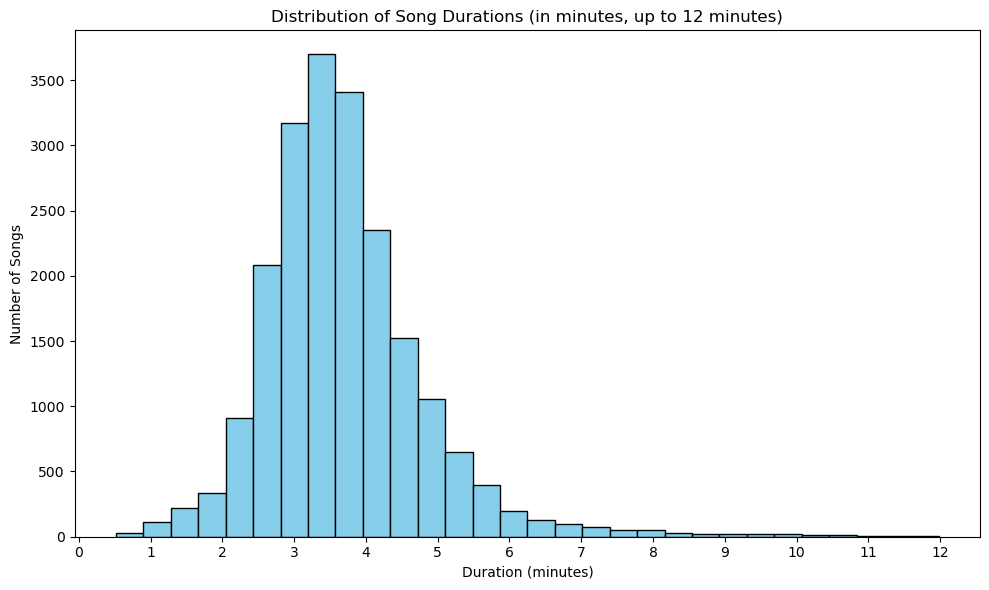

In [28]:
# Filter out songs that are more than 12 minutes and exclude null values in 'Duration_min_float'
df_filtered = df[(df['Duration_min_float'] <= 12) & (df['Duration_min_float'].notnull())]

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['Duration_min_float'], bins=30, color='skyblue', edgecolor='black')

# Set custom x-axis ticks
plt.xticks(ticks=range(0, 13, 1))  # From 0 to 12, with step of 1

# Set the title and labels
plt.title('Distribution of Song Durations (in minutes, up to 12 minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Songs')

# Show the plot
plt.tight_layout()
plt.show()

>The histogram analysis of song durations reveals that the majority of songs fall between 3 to 4 minutes, with a sharp peak around the 3-minute mark. This indicates a common industry standard for song length, optimizing listener engagement. As the duration increases beyond 5 minutes, the number of songs significantly decreases, with very few tracks exceeding 7 minutes. The distribution suggests that most popular songs are crafted within a specific time frame to align with listener preferences and industry norms.

### Pie Charts for Comparative Analysis of Views and Streams for Popular Songs

#### YouTube: Views vs. Streams for the Top 12 Most Popular Songs

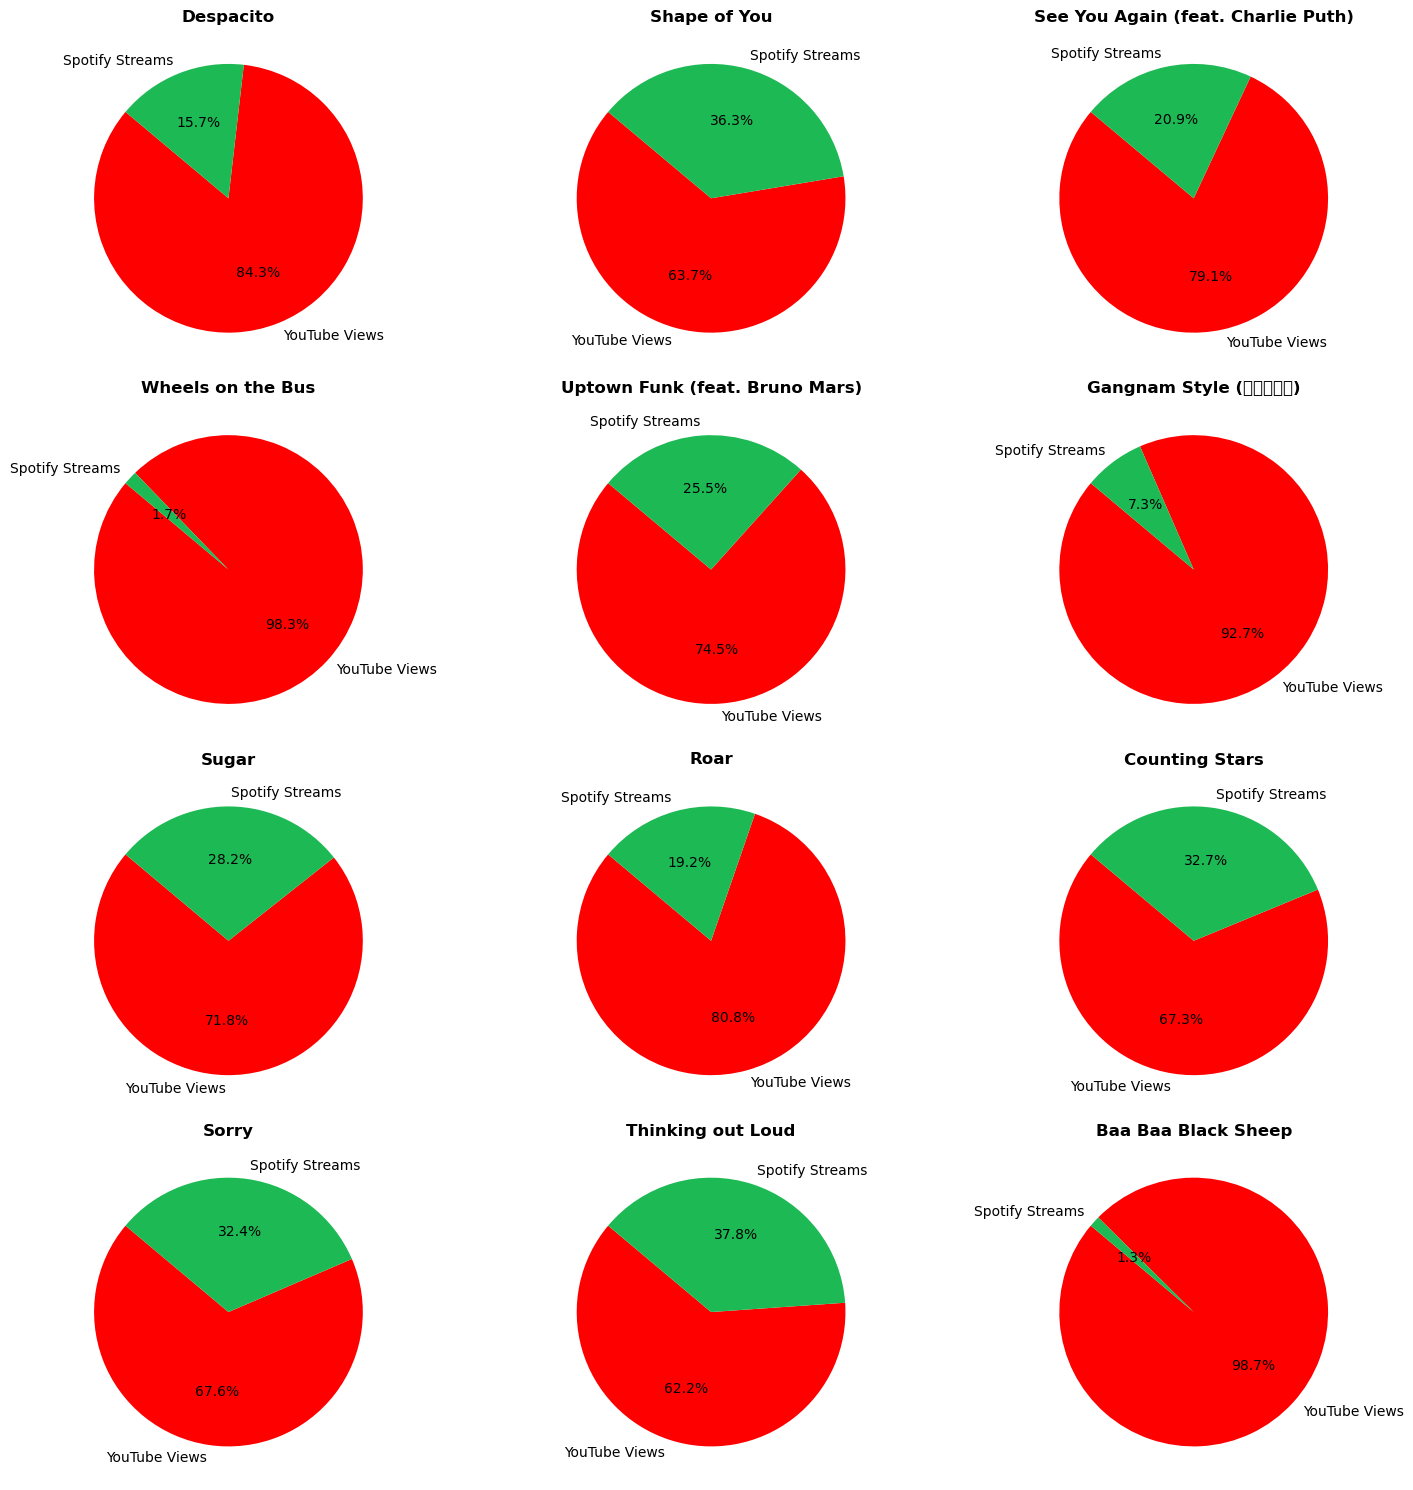

In [29]:
# Function to suppress warnings during plot creation
def create_pie_charts(data, title_prefix, num_rows=4, num_cols=3):
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))
    axes = axes.flatten()

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        
        for i, (index, row) in enumerate(data.iterrows()):
            # Skip rows with null values in 'Views' or 'Stream'
            if pd.isnull(row['Views']) or pd.isnull(row['Stream']):
                continue
            
            chart_data = [row['Views'], row['Stream']]
            labels = ['YouTube Views', 'Spotify Streams']
            colors = ['#FF0000', '#1DB954']
            
            axes[i].pie(chart_data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
            axes[i].set_title(f"{row['Track']}", fontsize=12, fontweight='bold')

        # Turn off any remaining unused axes
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

        plt.tight_layout()
        plt.show()

# Identify the 12 most popular songs on YouTube based on 'Views' while ensuring uniqueness
unique_youtube_songs = df.sort_values(by='Views', ascending=False).drop_duplicates(subset='Track').head(12)
create_pie_charts(unique_youtube_songs, title_prefix="YouTube")

>The pie charts comparing YouTube views and Spotify streams for the 12 most popular songs on YouTube reveal a significant difference in audience engagement across platforms. For most tracks, YouTube views vastly outweigh Spotify streams, highlighting YouTube's dominance in visual content consumption. Notable examples include "Despacito," "Gangnam Style," and "Wheels on the Bus," where views overwhelmingly surpass streams. However, tracks like "Shape of You" and "Thinking out Loud" show a more balanced distribution, indicating strong engagement on both platforms.

#### Spotify: Views vs. Streams for the Top 12 Most Popular Songs

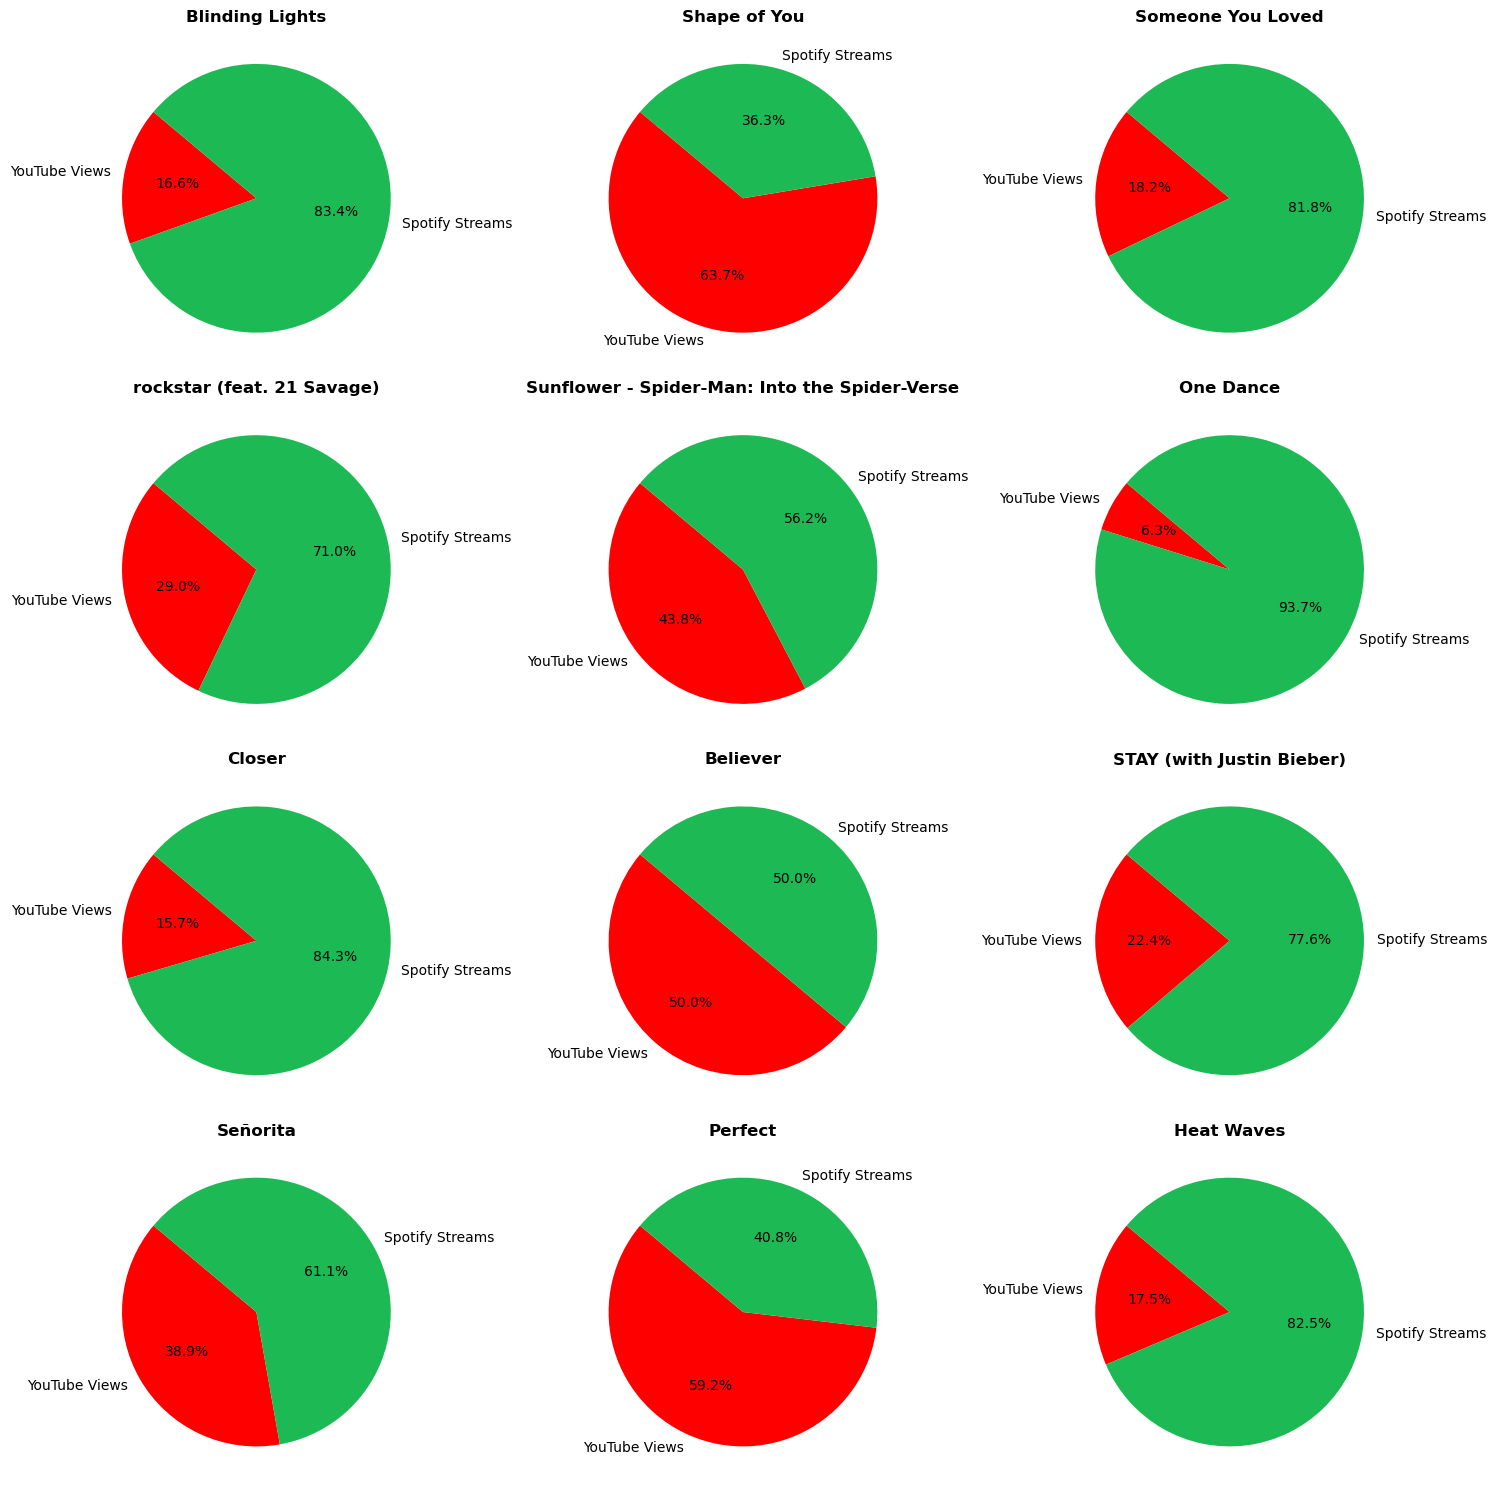

In [30]:
# Identify the 12 most popular songs on Spotify based on 'Stream' while ensuring uniqueness
unique_spotify_songs = df.sort_values(by='Stream', ascending=False).drop_duplicates(subset='Track').head(12)
create_pie_charts(unique_spotify_songs, title_prefix="Spotify")

>The pie charts highlight the clear preference for Spotify among the 12 most popular songs on the platform. For tracks like "Blinding Lights," "Closer," and "One Dance," Spotify streams overwhelmingly surpass YouTube views. However, there are notable exceptions where YouTube views outnumber streams, such as with "Shape of You," "Perfect," and "Sunflower." These exceptions suggest that while Spotify is dominant for these songs, they also maintain significant visual engagement on YouTube, reflecting a broader appeal across both platforms.

### Audio Feature Comparison Using Horizontal Bar Charts

#### YouTube: Audio Features of the Top 20 Most Popular Songs

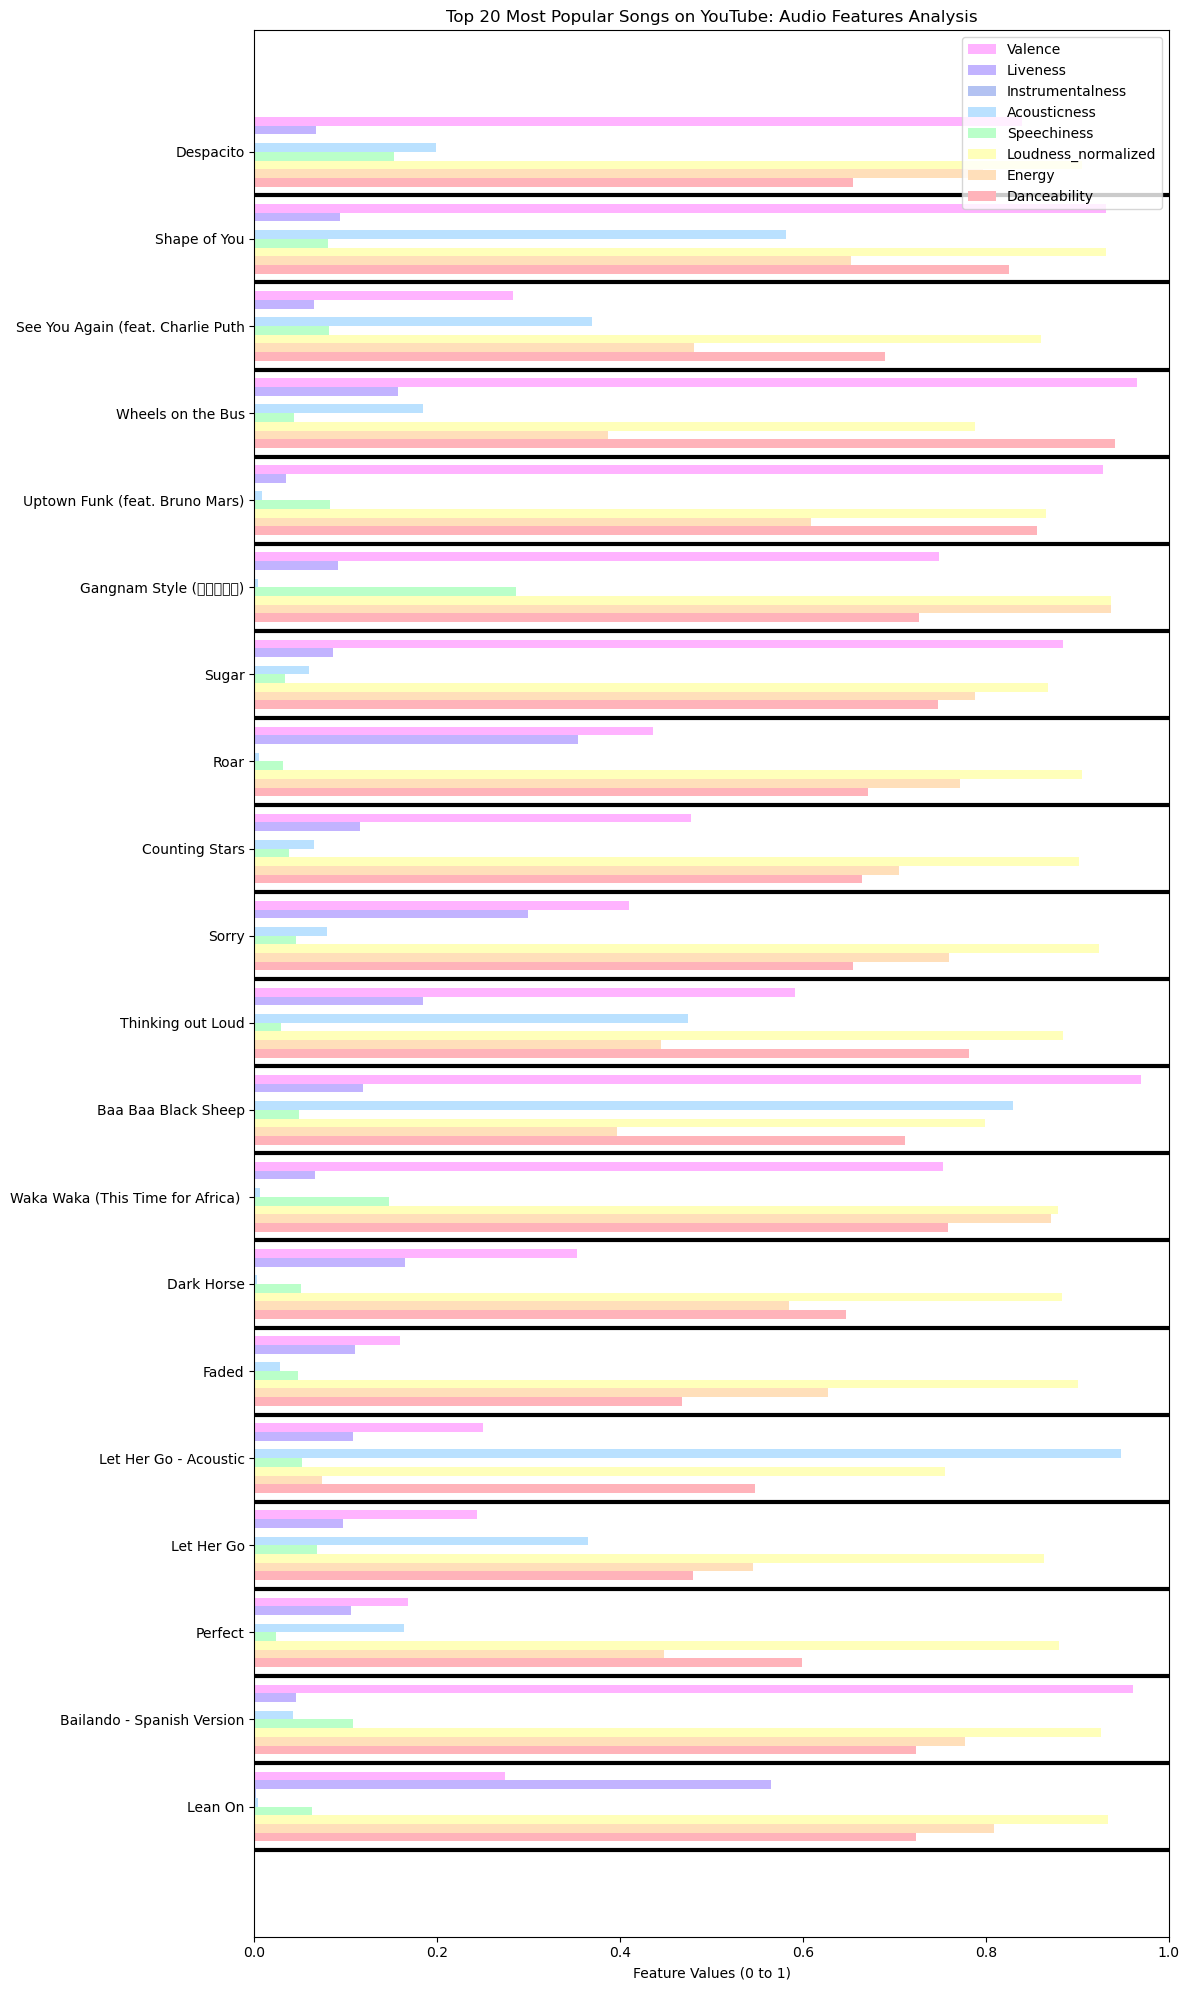

In [31]:
# Suppress specific font warnings during plotting
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    # Normalize 'Loudness' from the range [-60, 1] to [0, 1]
    df['Loudness_normalized'] = (df['Loudness'] + 60) / 61

    # Select the 20 most popular unique songs on YouTube based on 'Views'
    top_20_youtube_songs = df.sort_values(by='Views', ascending=False).drop_duplicates(subset='Track').head(20)

    # Reverse the order so the most popular song is on top
    top_20_youtube_songs = top_20_youtube_songs[::-1]

    # Prepare the data
    features = ['Danceability', 'Energy', 'Loudness_normalized', 'Speechiness',
                 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence']
    colors = ['#FFB3BA', '#FFDFBA', '#FFFFBA', '#BAFFC9', '#BAE1FF', '#B3C2F2', '#C2B3FF', '#FFB3FF']

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 20))

    # Positioning for each feature's bars
    bar_width = 0.1
    positions = np.arange(len(top_20_youtube_songs))

    # Initialize lists to store the handles and labels for the legend
    bars = []

    for i, feature in enumerate(features):
        # Skip songs with null values for this feature
        feature_values = top_20_youtube_songs[feature].dropna()
        
        # Ensure the plot only includes valid rows
        valid_positions = positions[:len(feature_values)]
        
        # Plot bars from 0 to the value of the feature
        bars.append(ax.barh(valid_positions + i * bar_width, feature_values, height=bar_width, color=colors[i], label=feature))

    # Adjust y-ticks to be lower
    y_ticks_adjusted = positions[:len(feature_values)] + (len(features) - 1) * bar_width / 2

    # Set the y-ticks to be the song names, limited to 33 characters
    ax.set_yticks(y_ticks_adjusted)
    ax.set_yticklabels([name[:33] for name in top_20_youtube_songs['Track'][:len(y_ticks_adjusted)]])

    # Add custom horizontal lines to better separate the songs
    for pos in y_ticks_adjusted - 0.5:
        ax.hlines(pos, xmin=0, xmax=1, color='black', linestyle='-', linewidth=3)

    # Set x-axis limits and labels
    ax.set_xlim(0, 1)
    ax.set_xlabel('Feature Values (0 to 1)')

    # Set the title
    ax.set_title('Top 20 Most Popular Songs on YouTube: Audio Features Analysis')

    # Reverse the legend order to match the plot order
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], loc='upper right')

    # Show the plot
    plt.tight_layout()
    plt.show()

>The YouTube - Audio Features of the Top 20 Most Popular Songs chart provides insights into the varied musical attributes of these highly viewed songs. The analysis reveals a wide range of values across key audio features, such as Danceability, Energy, Loudness, Speechiness, and others. Many popular songs exhibit high energy and danceability, indicating their appeal in dynamic and rhythmic content. However, there is significant variation, especially in features like Valence and Loudness, reflecting the diversity of musical styles within the top-ranking songs on YouTube.

#### Spotify: Audio Features of the Top 20 Most Popular Songs

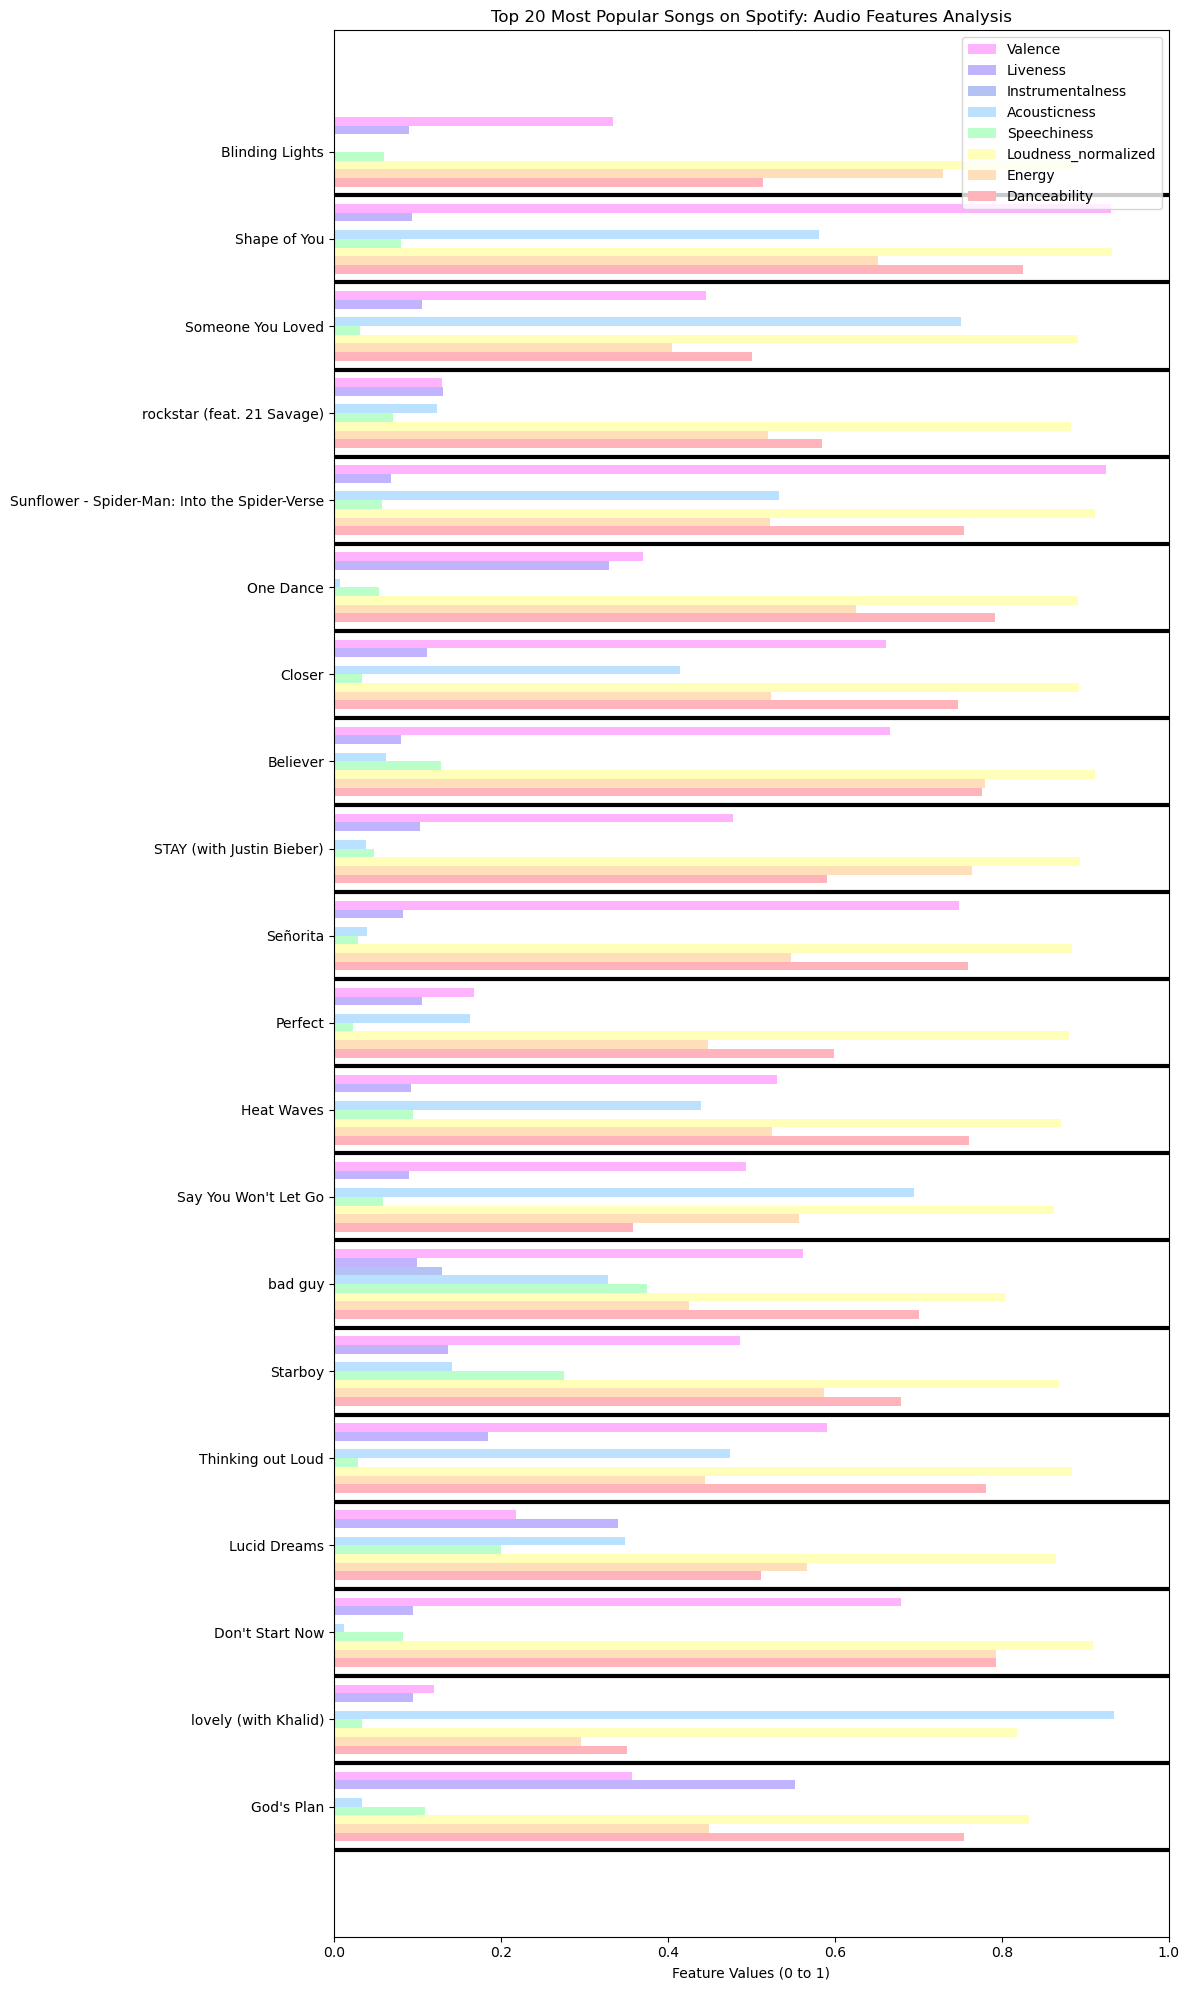

In [32]:
# Suppress specific font warnings during plotting
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    # Select the 20 most popular unique songs on Spotify based on 'Stream'
    top_20_spotify_songs = df.sort_values(by='Stream', ascending=False).drop_duplicates(subset='Track').head(20)

    # Reverse the order so the most popular song is on top
    top_20_spotify_songs = top_20_spotify_songs[::-1]

    # Prepare the data
    features = ['Danceability', 'Energy', 'Loudness_normalized', 'Speechiness',
                'Acousticness', 'Instrumentalness', 'Liveness', 'Valence']
    colors = ['#FFB3BA', '#FFDFBA', '#FFFFBA', '#BAFFC9', '#BAE1FF', '#B3C2F2', '#C2B3FF', '#FFB3FF']

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 20))

    # Positioning for each feature's bars
    bar_width = 0.1
    positions = np.arange(len(top_20_spotify_songs))

    # Initialize lists to store the handles and labels for the legend
    bars = []

    for i, feature in enumerate(features):
        # Skip songs with null values for this feature
        feature_values = top_20_spotify_songs[feature].dropna()
        
        # Ensure the plot only includes valid rows
        valid_positions = positions[:len(feature_values)]
        
        # Plot bars from 0 to the value of the feature
        bars.append(ax.barh(valid_positions + i * bar_width, feature_values, height=bar_width, color=colors[i], label=feature))

    # Adjust y-ticks to be lower
    y_ticks_adjusted = positions[:len(feature_values)] + (len(features) - 1) * bar_width / 2

    # Set the y-ticks to be the song names
    ax.set_yticks(y_ticks_adjusted)
    ax.set_yticklabels(top_20_spotify_songs['Track'][:len(y_ticks_adjusted)])

    # Add custom horizontal lines to better separate the songs
    for pos in y_ticks_adjusted - 0.5:
        ax.hlines(pos, xmin=0, xmax=1, color='black', linestyle='-', linewidth=3)

    # Set x-axis limits and labels
    ax.set_xlim(0, 1)
    ax.set_xlabel('Feature Values (0 to 1)')

    # Set the title
    ax.set_title('Top 20 Most Popular Songs on Spotify: Audio Features Analysis')

    # Reverse the legend order to match the plot order
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], loc='upper right')

    # Show the plot
    plt.tight_layout()
    plt.show()

>The Spotify - Audio Features of the Top 20 Most Popular Songs chart shows the diverse range of musical elements that characterize these top-streamed tracks. Similar to YouTube, songs with high energy and danceability are prevalent, suggesting their widespread appeal. However, there are notable variations in features such as Liveness and Acousticness, indicating a blend of live performances and studio-recorded content. The chart also highlights how different audio attributes combine to create songs that resonate with Spotify listeners.

### Scatter Plot of Likes vs. Comments with Views Represented by Color

This scatter plot visualizes the relationship between Likes and Comments for songs, with the color of each point representing the quantile-transformed Views. By applying a quantile transformation to Views, Likes, and Comments, we normalize these values to better highlight patterns and correlations. This plot helps to identify whether songs with more comments also tend to have more likes and how the number of views correlate with this relationship.

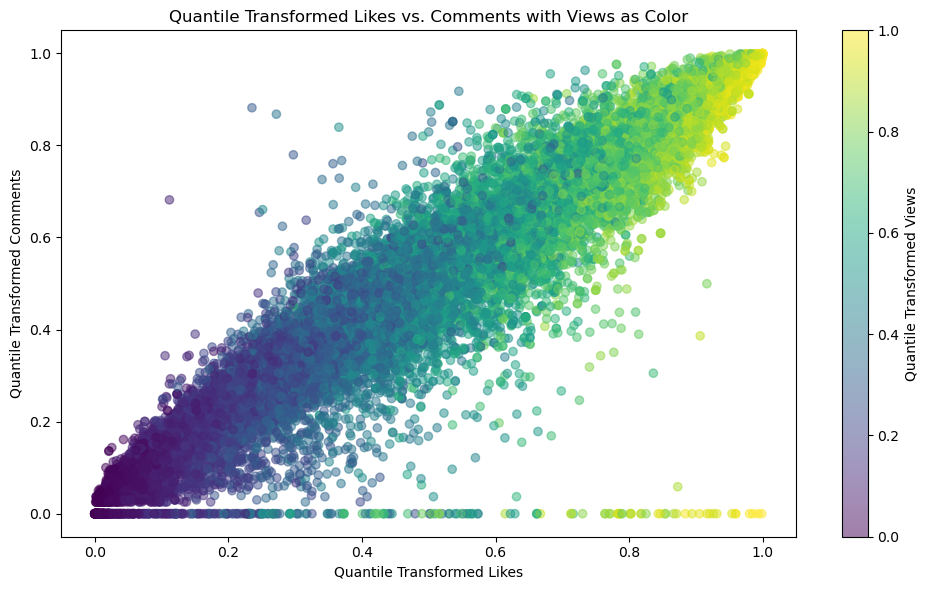

In [33]:
from sklearn.preprocessing import QuantileTransformer

# Handle null values by creating a copy of the dataframe with only the non-null rows for the relevant columns
df_non_null = df[['Views', 'Likes', 'Comments']].dropna()

# Apply quantile transformation to Views, Likes, and Comments
quantile_transformer = QuantileTransformer(output_distribution='uniform', n_quantiles=1000)
df_non_null['Quantile_Views'] = quantile_transformer.fit_transform(df_non_null[['Views']])
df_non_null['Quantile_Likes'] = quantile_transformer.fit_transform(df_non_null[['Likes']])
df_non_null['Quantile_Comments'] = quantile_transformer.fit_transform(df_non_null[['Comments']])

# Create a scatter plot for Likes vs. Comments, with Views as color
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_non_null['Quantile_Likes'], df_non_null['Quantile_Comments'], c=df_non_null['Quantile_Views'], cmap='viridis', alpha=0.5)

# Set the title and labels
plt.title('Quantile Transformed Likes vs. Comments with Views as Color')
plt.xlabel('Quantile Transformed Likes')
plt.ylabel('Quantile Transformed Comments')

# Add a color bar to represent Views
cbar = plt.colorbar(scatter)
cbar.set_label('Quantile Transformed Views')

# Show the plot
plt.tight_layout()
plt.show()

>The scatter plot shows a strong positive correlation between the number of likes and comments on songs, indicating that tracks with more likes also typically receive more comments. The color gradient, representing the quantile-transformed views, highlights that songs with higher views (shown in brighter colors) generally align with the upper right quadrant, where both likes and comments are high. Additionally, there is a visible line of songs with no comments, likely due to the comment option being disabled, yet these songs still exhibit a positive correlation between views and likes. This relationship shows that these metrics are closely connected, emphasizing that popular songs tend to receive higher engagement in all areas.

---

## Overall Conclusions: Insights from the Spotify and YouTube Data Analysis
The analysis of the "Spotify and YouTube" dataset revealed several key insights into the popularity, audio features, and engagement metrics of songs across both platforms.

**Duration and Popularity:** Most songs have a typical duration of 3 to 4 minutes. However, songs with higher streams and views don't necessarily align with longer durations.

**Engagement Metrics:** The analysis demonstrated a strong correlation between likes and comments, with popular songs generally receiving high engagement. Even in cases where comments are disabled, the positive correlation between views and likes is evident.

**Platform-Specific Insights:**
- **YouTube:** The analysis showed that some songs, particularly viral hits, have significantly higher YouTube views than Spotify streams. Songs like "Despacito" and "Shape of You" stand out for their massive view counts.
- **Spotify:** On the other hand, Spotify's top songs often show a more balanced distribution between streams and views, indicating a different user engagement pattern. Some songs like "Blinding Lights" and "rockstar" have far more streams on Spotify than views on YouTube.

**Audio Features:** Across both platforms, audio features like energy, danceability, and loudness varied significantly among the top songs. This diversity in audio characteristics highlights that there's no one-size-fits-all formula for a hit song—various styles and attributes can achieve popularity.

**Overall Conclusion:** The data showcases how songs can achieve immense popularity across different platforms with varying user interactions and preferences. The analysis emphasizes the importance of considering multiple metrics—such as views, streams, likes, comments, and audio features—when evaluating a song's success. This multi-dimensional approach provides a comprehensive understanding of what makes a song resonate with a broad audience.